<a href="https://colab.research.google.com/github/ThienThai261/ml_project2/blob/main/Lab_Final_21130502_ThaiBinhThienQuoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=424c61fafcdead4aa79b3759575c31e7452e5dc211dc48409c6ed0ff0bb6ee47
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/dataset'

Mounted at /content/gdrive
/content/gdrive/MyDrive/dataset


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")


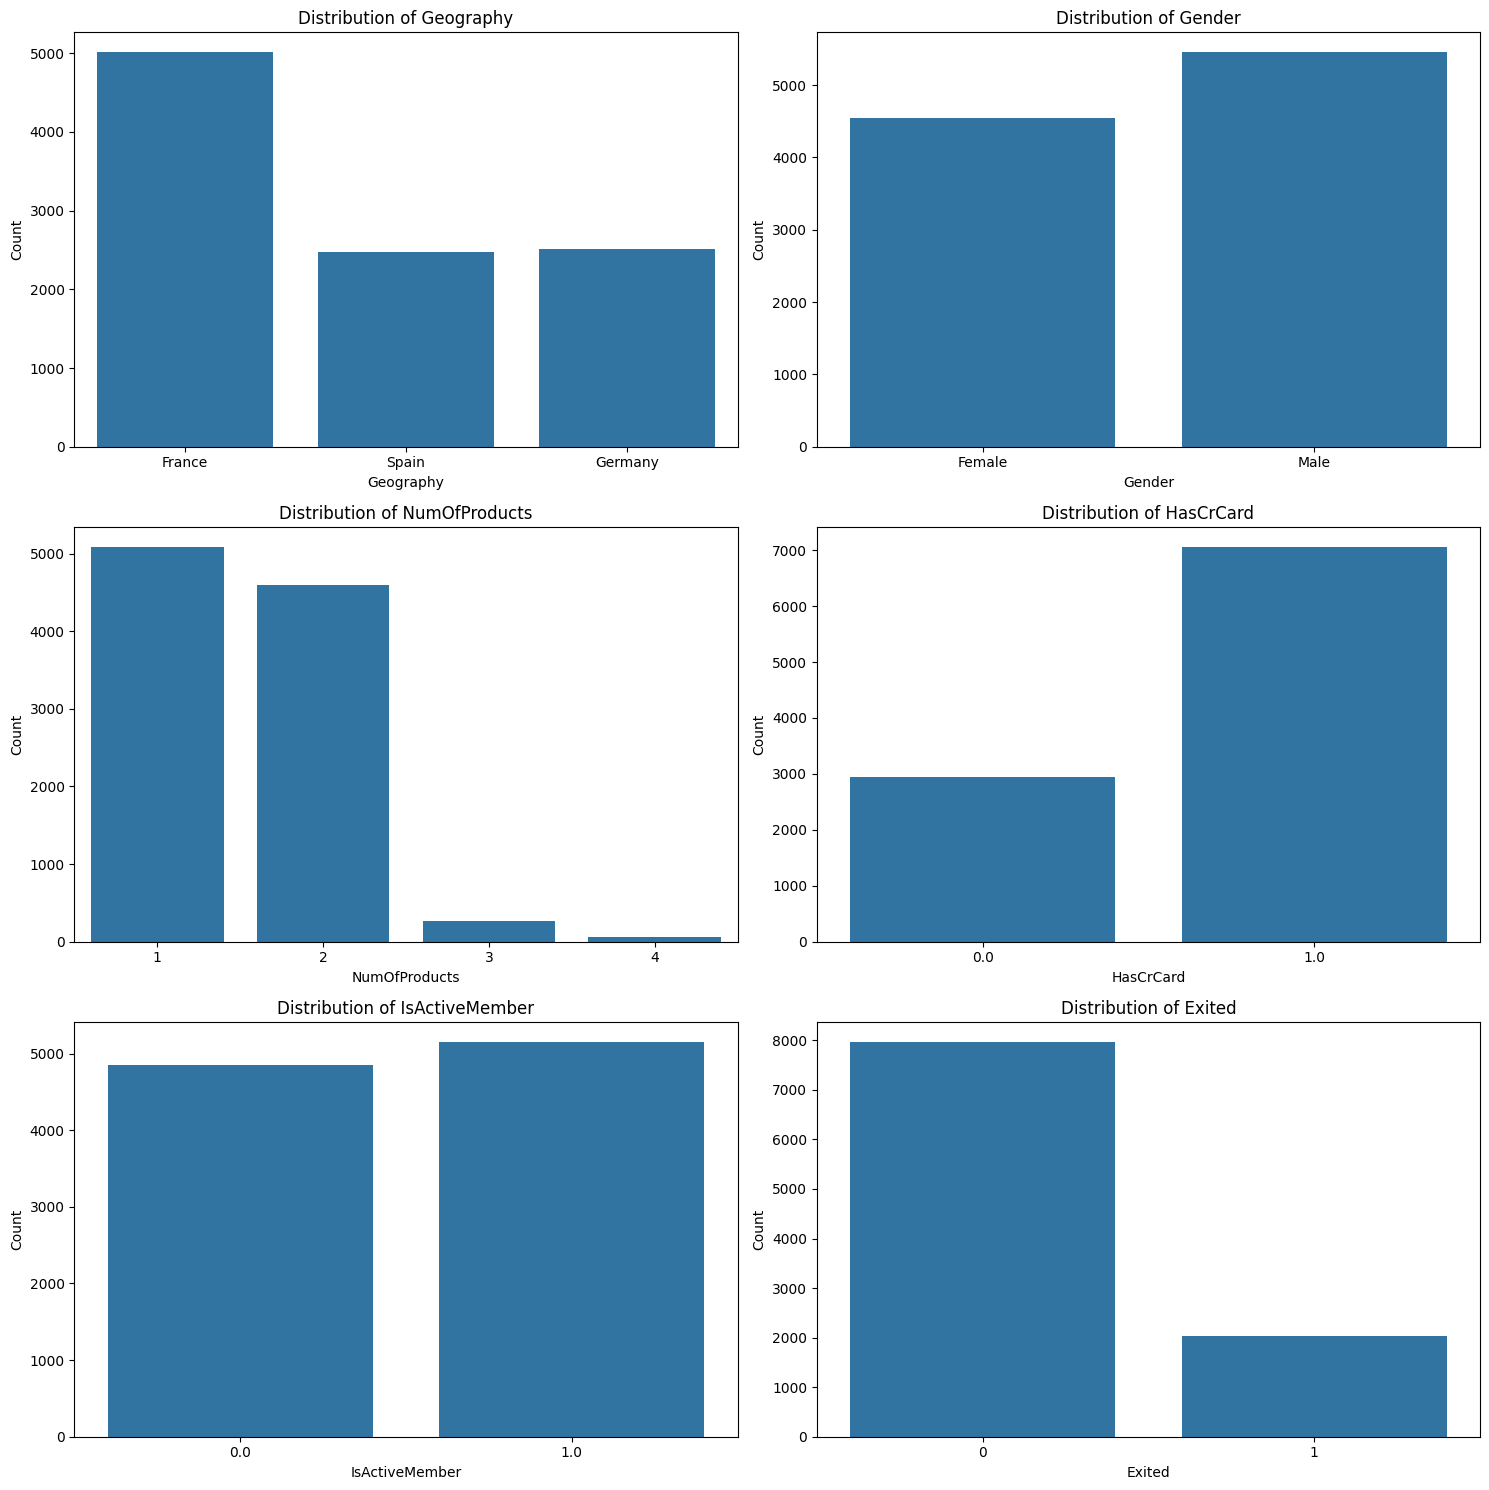

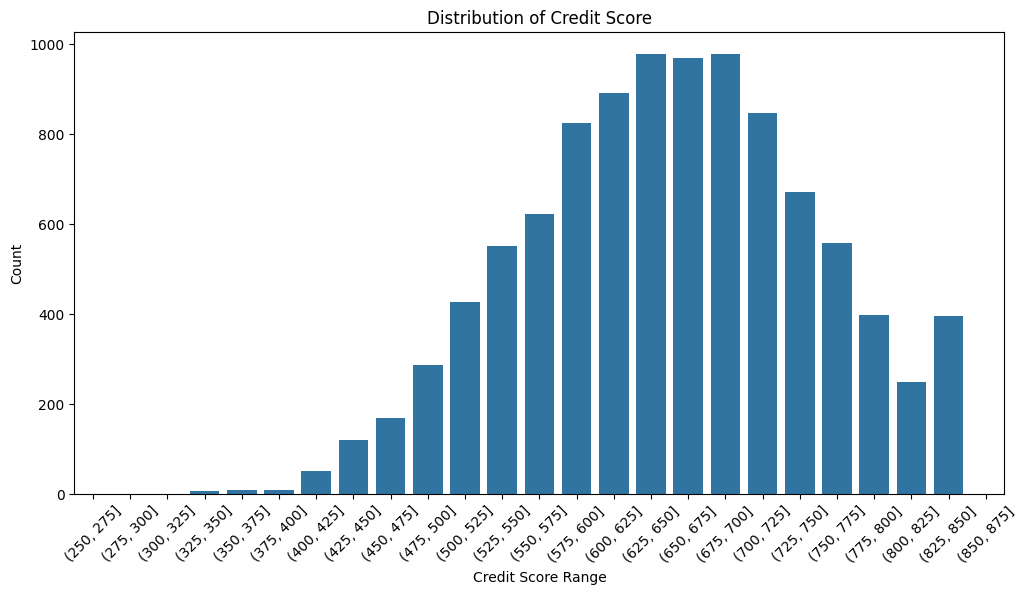

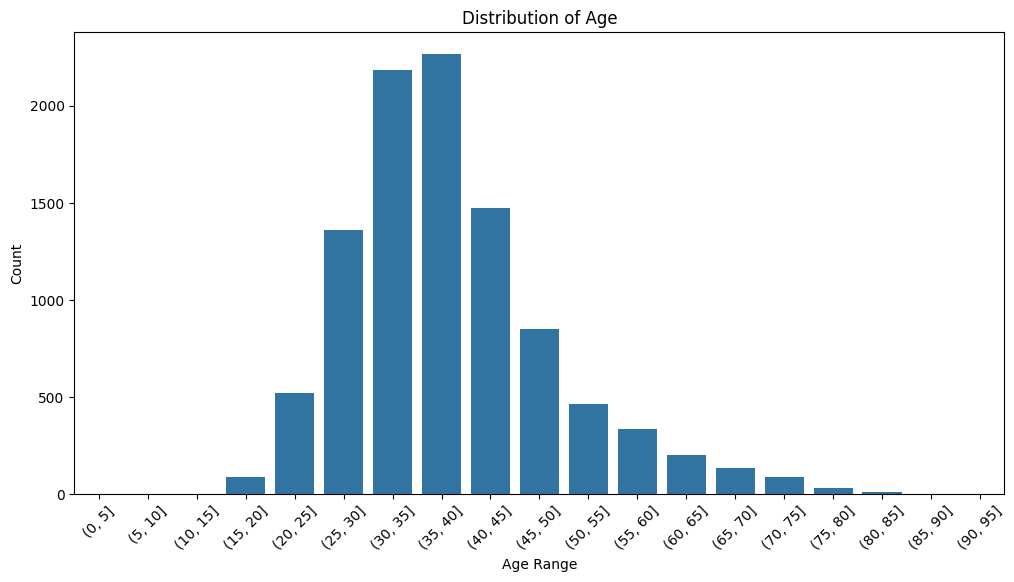

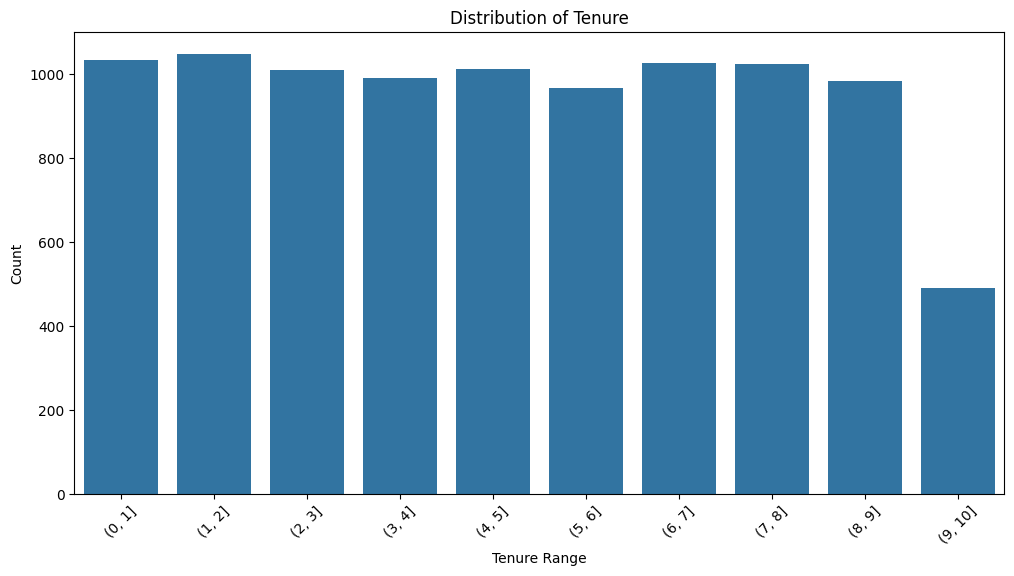

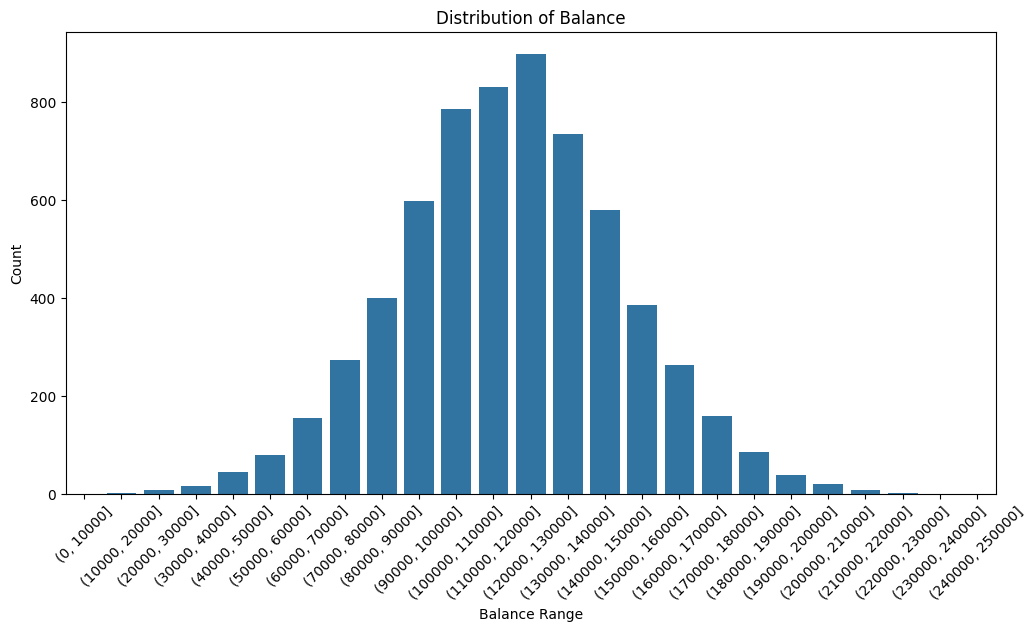

In [ ]:
columns_to_plot = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

# Tạo các subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Vẽ biểu đồ đếm cho từng cột
for i, col in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Tạo các khoảng (bins) cho CreditScore, Age, Tenure, và Balance
bin_edges_credit_score = range(250, 900, 25)
bin_edges_age = range(0, 100, 5)
bin_edges_tenure = range(0, 11, 1)
bin_edges_balance = range(0, 260000, 10000)

df['CreditScoreBin'] = pd.cut(df['CreditScore'], bins=bin_edges_credit_score)
df['AgeBin'] = pd.cut(df['Age'], bins=bin_edges_age)
df['TenureBin'] = pd.cut(df['Tenure'], bins=bin_edges_tenure)
df['BalanceBin'] = pd.cut(df['Balance'], bins=bin_edges_balance)

# Plot CreditScore distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=df['CreditScoreBin'])
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot Age distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=df['AgeBin'])
plt.title('Distribution of Age')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot Tenure distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=df['TenureBin'])
plt.title('Distribution of Tenure')
plt.xlabel('Tenure Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot Balance distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=df['BalanceBin'])
plt.title('Distribution of Balance')
plt.xlabel('Balance Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Tien xu li du lieu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


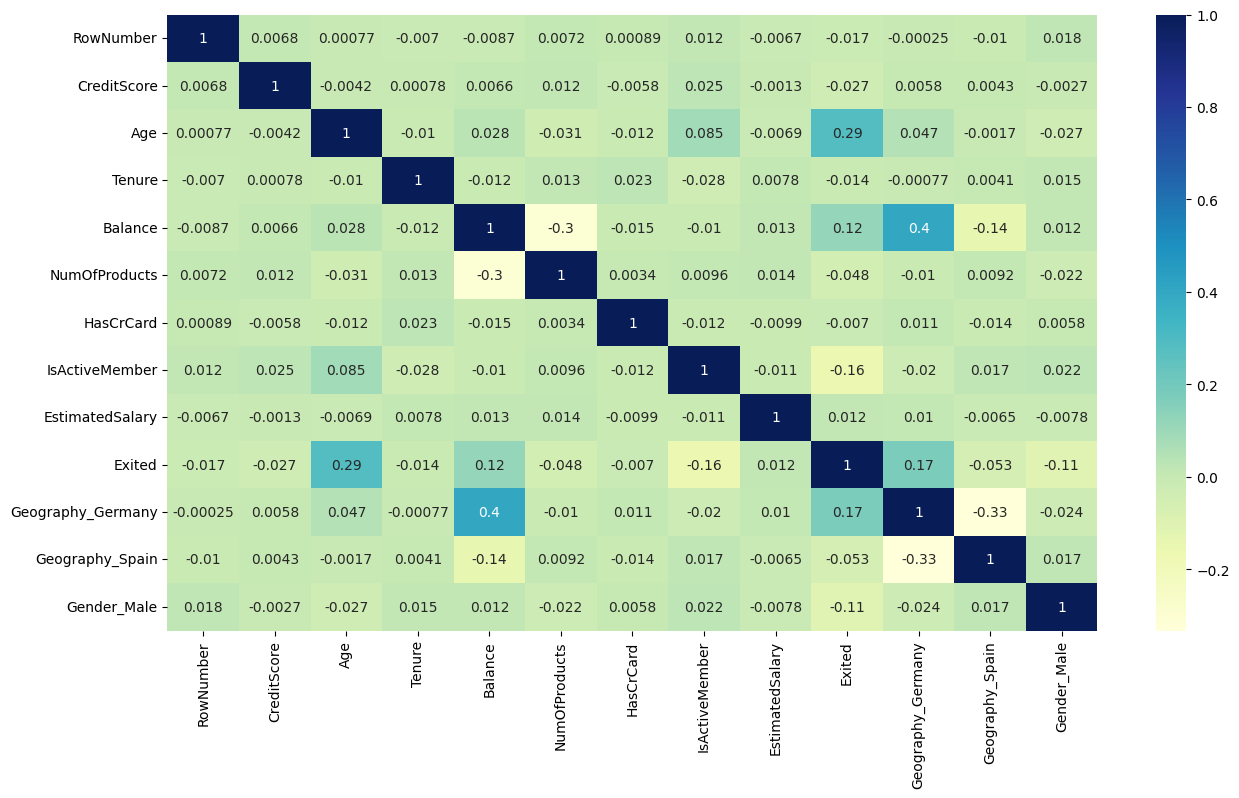

In [ ]:
df.info()
df.describe()
df.head()

# Drop CustomerID and Surname columns as they are not useful for prediction
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

# Handle missing values (if any)
df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Split data into features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize correlations
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

RandomForest algth

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Select features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline RandomForest model
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Baseline RandomForest Accuracy: {accuracy_forest:.2f}")

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)

best_forest = grid_search.best_estimator_
y_pred_best_forest = best_forest.predict(X_test)
accuracy_best_forest = accuracy_score(y_test, y_pred_best_forest)

print(f"Best RandomForest Accuracy: {accuracy_best_forest:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_forest))


Baseline RandomForest Accuracy: 0.85
Best RandomForest Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1572
           1       0.78      0.45      0.57       428

    accuracy                           0.85      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.85      0.84      2000

Confusion Matrix:
[[1517   55]
 [ 237  191]]


Neural Network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report


# Select features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Preprocess the data
X.fillna(X.mean(), inplace=True)  # Handle missing values

# Encode categorical variables
X = pd.get_dummies(X)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32").flatten()
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print(f"Neural Network Accuracy: {accuracy_nn:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))


Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.4464 - accuracy: 0.8043 - val_loss: 0.4045 - val_accuracy: 0.8231
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8412 - val_loss: 0.3669 - val_accuracy: 0.8519
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3589 - accuracy: 0.8565 - val_loss: 0.3533 - val_accuracy: 0.8594
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8590 - val_loss: 0.3436 - val_accuracy: 0.8644
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8637 - val_loss: 0.3458 - val_accuracy: 0.8631
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8648 - val_loss: 0.3485 - val_accuracy: 0.8644
Epoch 7/100
200/200 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8668 - val_loss: 0.3440 - val_accuracy: 0.8556

Show plot

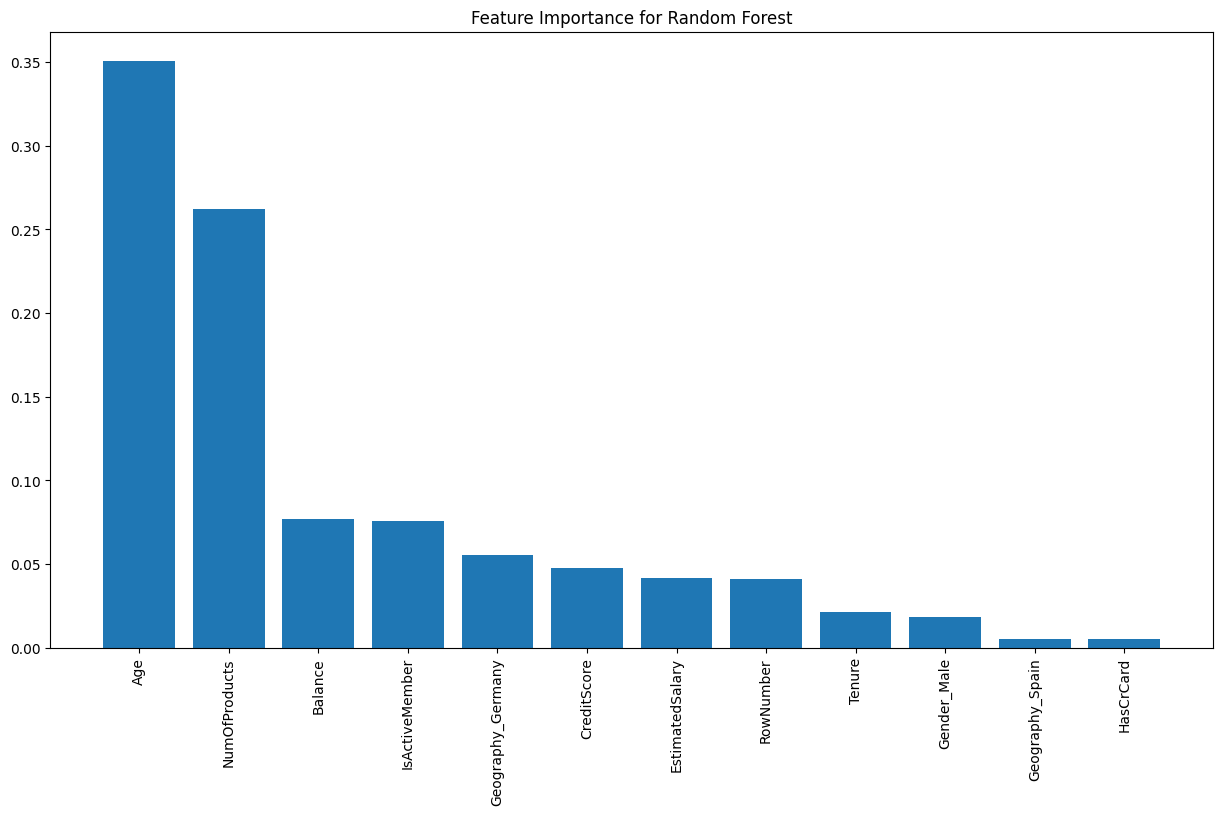

63/63 [==============================] - 0s 1ms/step


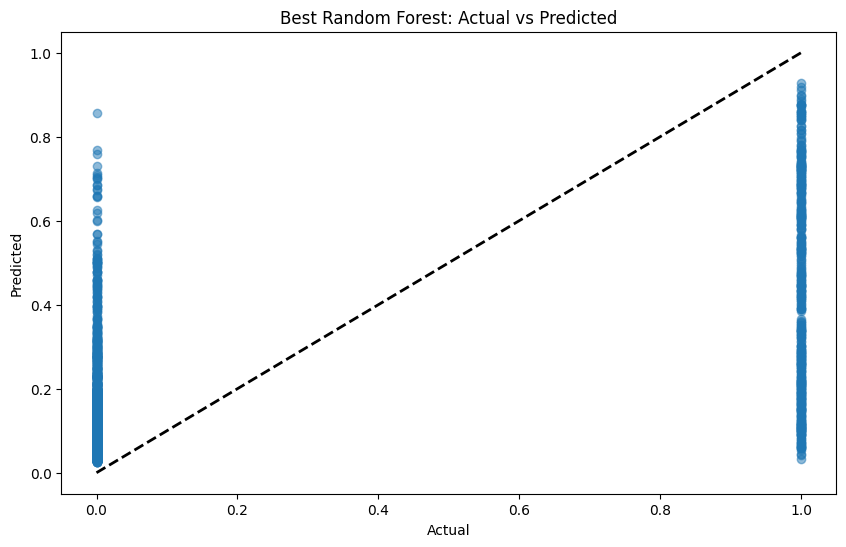

63/63 [==============================] - 0s 2ms/step


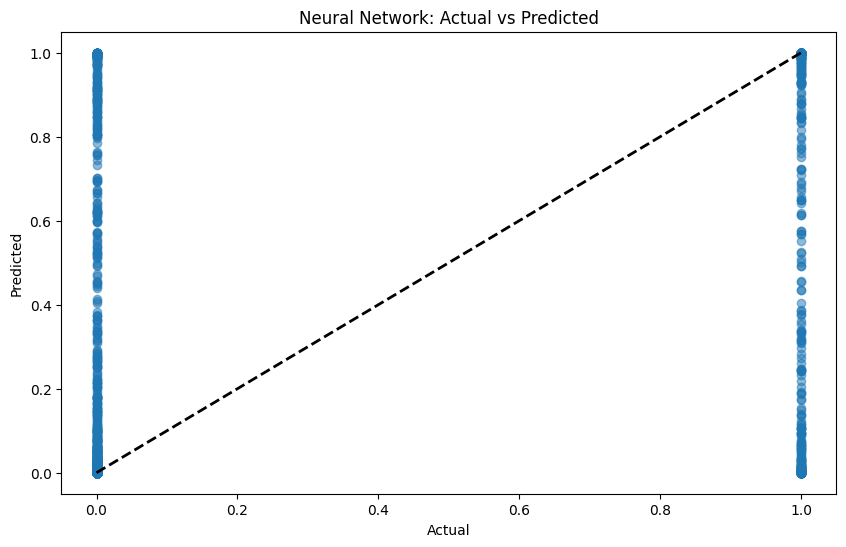

                Model  Accuracy (%)
0  Best Random Forest        0.8525
1      Neural Network        0.8200


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from eli5.sklearn import PermutationImportance
import eli5

# Define a Keras wrapper class
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.2)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32").flatten()

    def predict_proba(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

# Function to plot feature importances
def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [feature_names[i] for i in indices]

    plt.figure(figsize=(15, 8))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), names, rotation=90)
    plt.show()

# Make sure best_forest is fitted. This was likely missing in the original code
best_forest.fit(X_train, y_train) # Fit the best model to the training data

# Plot feature importances for Random Forest
plot_feature_importances(best_forest, X.columns, "Feature Importance for Random Forest")

# Calculate and plot feature importances for Neural Network using permutation importance
nn_wrapper = KerasClassifierWrapper(model)
nn_wrapper.fit(X_train, y_train)
perm = PermutationImportance(nn_wrapper, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.tolist())

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot actual vs predicted for Random Forest
y_pred_best_forest_prob = best_forest.predict_proba(X_test)[:, 1]
plot_actual_vs_predicted(y_test, y_pred_best_forest_prob, "Best Random Forest: Actual vs Predicted")

# Plot actual vs predicted for Neural Network
y_pred_nn_prob = model.predict(X_test).flatten()
plot_actual_vs_predicted(y_test, y_pred_nn_prob, "Neural Network: Actual vs Predicted")

# Summary Report
models = ['Best Random Forest', 'Neural Network']
accuracies = [accuracy_best_forest, accuracy_nn]

report = pd.DataFrame({'Model': models, 'Accuracy (%)': accuracies})
print(report)






In [ ]:
from prettytable import PrettyTable

# Calculate metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
report_forest = classification_report(y_test, y_pred_forest, output_dict=True)
accuracy_best_forest = accuracy_score(y_test, y_pred_best_forest)
report_best_forest = classification_report(y_test, y_pred_best_forest, output_dict=True)

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]

# Add data for Neural Network
table.add_row([
    "Neural Network",
    f"{accuracy_nn:.2f}",
    f"{report_nn['1']['precision']:.2f}",
    f"{report_nn['1']['recall']:.2f}",
    f"{report_nn['1']['f1-score']:.2f}"
])

# Add data for Baseline RandomForest
table.add_row([
    "Baseline RandomForest",
    f"{accuracy_forest:.2f}",
    f"{report_forest['1']['precision']:.2f}",
    f"{report_forest['1']['recall']:.2f}",
    f"{report_forest['1']['f1-score']:.2f}"
])

# Add data for Best RandomForest after GridSearchCV
table.add_row([
    "Best RandomForest",
    f"{accuracy_best_forest:.2f}",
    f"{report_best_forest['1']['precision']:.2f}",
    f"{report_best_forest['1']['recall']:.2f}",
    f"{report_best_forest['1']['f1-score']:.2f}"
])

# Print the table
print(table)




+-----------------------+----------+-----------+--------+----------+
|         Model         | Accuracy | Precision | Recall | F1-score |
+-----------------------+----------+-----------+--------+----------+
|     Neural Network    |   0.82   |    0.59   |  0.50  |   0.54   |
| Baseline RandomForest |   0.85   |    0.77   |  0.44  |   0.56   |
|   Best RandomForest   |   0.85   |    0.77   |  0.44  |   0.56   |
+-----------------------+----------+-----------+--------+----------+
